In [1]:
# pre-processing
import pandas as pd
df = pd.read_csv("dataset.csv")

In [2]:
# import plt
import matplotlib.pyplot as plt


In [3]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [4]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

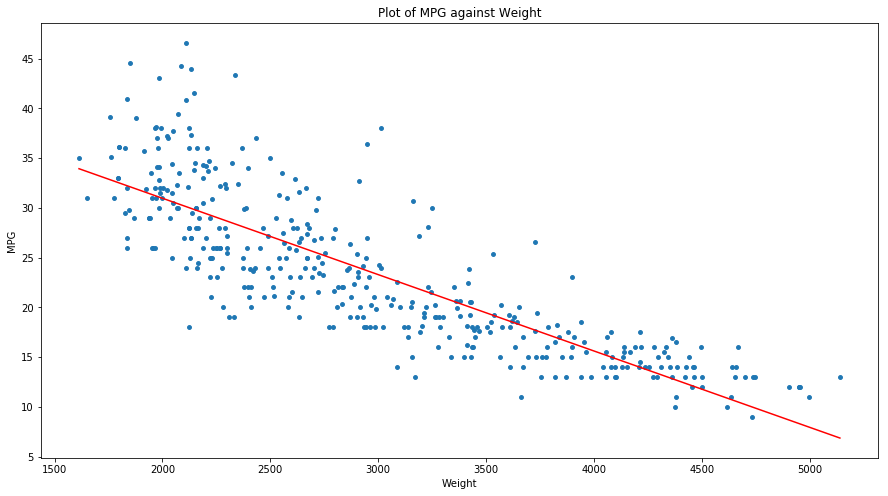

In [45]:
plt.figure(figsize=(15,8))
plt.scatter(df['weight'], df['mpg'],s = 15)
plt.title('Plot of MPG against Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.plot(np.unique(df['weight']), np.poly1d(np.polyfit(df['weight'], df['mpg'], 1))(np.unique(df['weight'])), color = 'r')
plt.show()

In [4]:
# import the required packages
import statsmodels.formula.api as smf
# ols stands for Ordinary Least Squares, which is the most common method used to estimate regression coefficients
ols = smf.ols(formula='mpg ~ weight + acceleration', data=df)
ols_result = ols.fit()
# print out 
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     456.0
Date:                Tue, 22 Oct 2019   Prob (F-statistic):          2.95e-103
Time:                        15:20:16   Log-Likelihood:                -1141.7
No. Observations:                 397   AIC:                             2289.
Df Residuals:                     394   BIC:                             2301.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       41.3511      1.874     22.065   

-0.007676605776976105 46.3173991752533 -0.8317389141223785 5.373129109914994e-103 0.0002578144761989619


In [9]:
# import the required packages
import statsmodels.formula.api as smf
# ols stands for Ordinary Least Squares, which is the most common method used to estimate regression coefficients
ols = smf.ols(formula='mpg ~ cylinders + horsepower + displacement + weight + origin + year', data=df)
ols_result = ols.fit()
# print out 
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     299.2
Date:                Wed, 06 Nov 2019   Prob (F-statistic):          1.50e-142
Time:                        13:58:37   Log-Likelihood:                -1037.5
No. Observations:                 397   AIC:                             2089.
Df Residuals:                     390   BIC:                             2117.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -15.8379      4.156     -3.811   

In [11]:
df['predicted'] = 0
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,predicted
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


In [12]:
for index, row in df.iterrows():
    df.iloc[index, 9] = -15.8379 - 0.4715 * row[1] - 0.0229 * row[3] + 0.019 * row[2] - 0.0063 * row[4] \
                        + 1.4229 * row[7] + 0.7525 * row[6]
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,predicted
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,15.2688
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,14.0936
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,15.4482
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,15.2011
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,15.2913


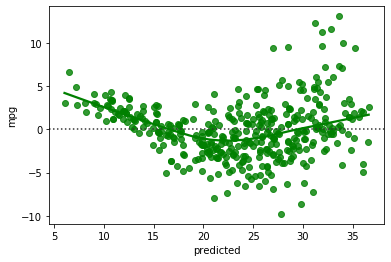

In [15]:
# plot residual
import seaborn as sns
x = df['predicted']
y = df['mpg']
sns.residplot(x, y, lowess=True, color="g")